# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [ ]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

In [ ]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

In [ ]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
# Aggregate data by year
df_aggregated = df.groupby("Year").mean().reset_index()

# Display the first few rows of the aggregated dataset
df_aggregated.head()


## 2. Univariate Analysis

Analyze each climate variable independently.

In [ ]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

# Descriptive statistics
desc_stats = df_aggregated.describe()

# Create visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histogram and boxplot for each variable
variables = df_aggregated.columns[1:]  # Excluding 'Year'
for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    
    # Histogram
    sns.histplot(df_aggregated[var], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {var}")
    
    # Boxplot
    sns.boxplot(x=df_aggregated[var], ax=axes[row, col])

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Display descriptive statistics
desc_stats

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here


# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv')

# Display the first few rows
print("Data Loaded Successfully:\n", df.head())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for key relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

# Additional scatter plots for specific bivariate relationships
sns.lmplot(x="CO2 Concentration (ppm)", y="Global Average Temperature (°C)", data=df)
plt.title("CO2 Concentration vs Global Temperature")
plt.show()

sns.lmplot(x="Sea Level Rise (mm)", y="Global Average Temperature (°C)", data=df)
plt.title("Sea Level Rise vs Global Temperature")
plt.show()

sns.lmplot(x="Arctic Ice Area (million km²)", y="Global Average Temperature (°C)", data=df)
plt.title("Arctic Ice Area vs Global Temperature")
plt.show()

# Additional check for bivariate analysis
corr_value = correlation_matrix.loc["CO2 Concentration (ppm)", "Global Average Temperature (°C)"]
print(f"Correlation between CO2 Concentration and Global Temperature: {corr_value:.2f}")


## 4. Multivariate Analysis

Investigate relationships among three or more variables.

<Figure size 1200x600 with 0 Axes>

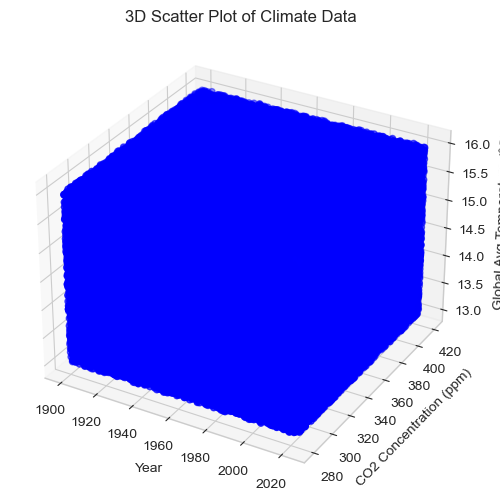

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

#pair plot
sns.pairplot(df)
plt.show()


# Multivariate Analysis - Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Climate Variables")
plt.show()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# # Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# # Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# # Create a dataframe for PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# # Scatter plot of PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])
plt.title("PCA Projection of Climate Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12,6))
parallel_coordinates(df, class_column='Year', colormap=plt.get_cmap("cool"))
plt.xticks(rotation=45)
plt.title("Parallel Coordinates Plot of Climate Data")
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Year'], df['CO2 Concentration (ppm)'], df['Global Average Temperature (°C)'], c='b', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_zlabel('Global Avg Temperature (°C)')
ax.set_title("3D Scatter Plot of Climate Data")

plt.show()




## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here